<a href="https://colab.research.google.com/github/SamyarZamani/social-media-data-analysis/blob/main/social-media-sentiment-engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# ساختار پوشه‌ها
os.makedirs("social-media-data-analysis/data", exist_ok=True)
os.makedirs("social-media-data-analysis/analysis", exist_ok=True)
os.makedirs("social-media-data-analysis/report", exist_ok=True)

# ساخت فایل‌های متنی خالی
open("social-media-data-analysis/README.md", "w").close()
open("social-media-data-analysis/requirements.txt", "w").close()


In [2]:
from google.colab import files
import shutil

uploaded = files.upload()  # فایل رو از سیستم انتخاب کن

# انتقال فایل به پوشه data
for filename in uploaded.keys():
    shutil.move(filename, f"social-media-data-analysis/data/{filename}")


Saving sentimentdataset.csv to sentimentdataset.csv


In [3]:
import pandas as pd

# بارگذاری داده
df = pd.read_csv("social-media-data-analysis/data/sentimentdataset.csv")

# نمایش ۵ ردیف اول
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# تبدیل Likes و Retweets به عدد صحیح (برای مرتب‌سازی راحت‌تر)
df["Likes"] = df["Likes"].astype(int)
df["Retweets"] = df["Retweets"].astype(int)

# نمایش ۱۰ پست برتر از نظر لایک
top_liked = df.sort_values(by="Likes", ascending=False).head(10)
print("Top 10 Posts by Likes:")
display(top_liked[["Text", "Likes", "Retweets", "Hashtags", "Platform"]])

# نمایش ۱۰ پست برتر از نظر ریتوییت
top_retweeted = df.sort_values(by="Retweets", ascending=False).head(10)
print("Top 10 Posts by Retweets:")
display(top_retweeted[["Text", "Likes", "Retweets", "Hashtags", "Platform"]])


Top 10 Posts by Likes:


,Text,Likes,Retweets,Hashtags,Platform
570,"Underneath the city lights, the dancer express...",80,40,#Mesmerizing #NightDancePerformance,Twitter
345,Motivated to achieve fitness goals after an in...,80,40,#Motivation #FitnessGoals,Facebook
368,Elation over discovering a rare book in a quai...,80,40,#Elation #RareBookDiscovery,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80,40,#Tranquility #SunsetBeauty,Instagram
382,A sense of wonder at the vastness of the cosmo...,80,40,#Wonder #StargazingAdventure,Instagram
355,Anticipation for an upcoming adventure in an e...,80,40,#Anticipation #AdventureAwaits,Twitter
335,Thrilled to witness the grandeur of a cultural...,80,40,#Thrill #CulturalCelebration,Instagram
432,"Heartache deepens, a solitary journey through ...",80,40,#Despair #AbyssOfHeartache,Instagram
402,Awe-inspired by the vastness of the cosmos on ...,80,40,#Wonder #StargazingAdventure,Instagram
470,"Dancing on sunshine, each step a celebration o...",80,40,#Joy #SimpleMoments,Instagram


Top 10 Posts by Retweets:


,Text,Likes,Retweets,Hashtags,Platform
560,"In the serene beauty of a sunset, nature unfol...",80,40,#Tranquility #SunsetBeauty,Instagram
540,Celebrating a historic victory in the World Cu...,80,40,#Joy #WorldCupTriumph,Instagram
570,"Underneath the city lights, the dancer express...",80,40,#Mesmerizing #NightDancePerformance,Twitter
550,"After a series of defeats, the soccer team fac...",80,40,#Disappointment #SoccerDefeats,Twitter
510,"At the front row of Adele's concert, each note...",80,40,#Emotion #AdeleConcert,Instagram
530,"Captivated by the spellbinding plot twists, th...",80,40,#Excitement #MoviePremiereThrills,Twitter
520,"At a Justin Bieber concert, the infectious bea...",80,40,#Enthusiasm #JustinBieber,Instagram
481,"Surrounded by the colors of joy, a canvas pain...",80,40,#Joy #EndlessSmiles,Instagram
402,Awe-inspired by the vastness of the cosmos on ...,80,40,#Wonder #StargazingAdventure,Instagram
382,A sense of wonder at the vastness of the cosmo...,80,40,#Wonder #StargazingAdventure,Instagram


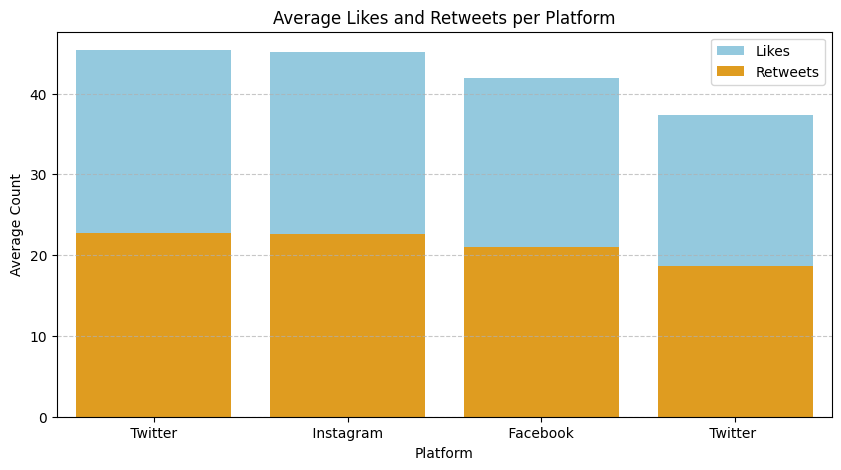

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# پلتفرم‌ها بر اساس میانگین Likes و Retweets
engagement_by_platform = df.groupby("Platform")[["Likes", "Retweets"]].mean().sort_values("Likes", ascending=False)

# رسم نمودار
plt.figure(figsize=(10,5))
sns.barplot(data=engagement_by_platform.reset_index(), x="Platform", y="Likes", color="skyblue", label="Likes")
sns.barplot(data=engagement_by_platform.reset_index(), x="Platform", y="Retweets", color="orange", label="Retweets")

plt.title("Average Likes and Retweets per Platform")
plt.ylabel("Average Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [6]:
# اطمینان از تبدیل ستون Timestamp به datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# استخراج ویژگی‌های زمانی
df["Hour"] = df["Timestamp"].dt.hour
df["DayOfWeek"] = df["Timestamp"].dt.day_name()
df["Month"] = df["Timestamp"].dt.month_name()


/tmp/ipython-input-2705289099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="coolwarm")


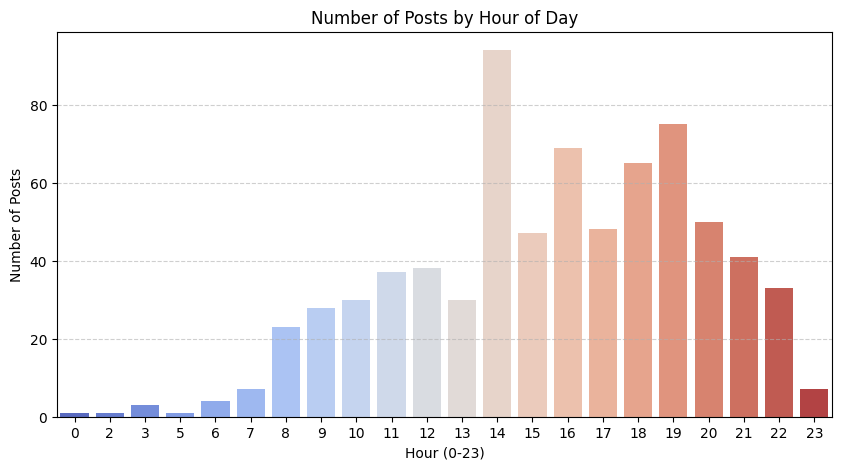

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Hour", palette="coolwarm")
plt.title("Number of Posts by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Posts")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


/tmp/ipython-input-589004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek", order=order, palette="viridis")


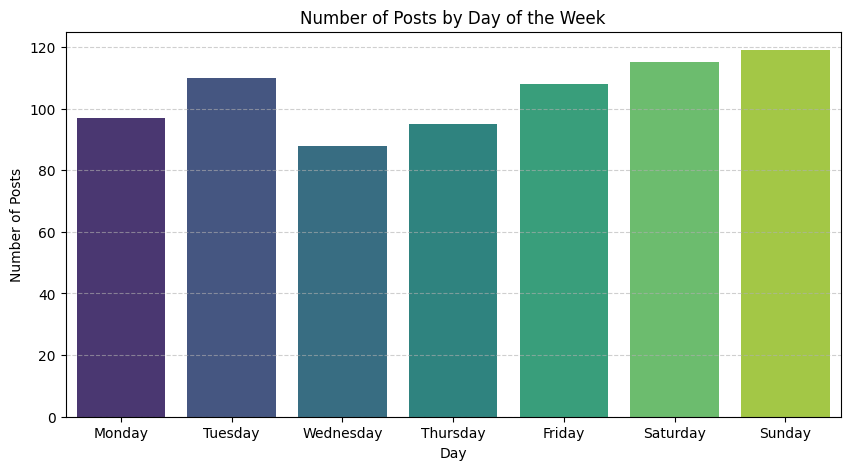

In [8]:
plt.figure(figsize=(10,5))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=df, x="DayOfWeek", order=order, palette="viridis")
plt.title("Number of Posts by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Posts")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [9]:
!pip install nltk --quiet
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### مقدمه‌ای بر روش تحلیل احساسات
اینجا همون قسمتی هست که تو جلسه مصاحبه کاری گفتین باید روش جدید استفاده کنم اولش سعی کردم روش همیشگی یعنی از الگوریتم های نظارت نشده ماشین لرنینگ استفاده کنم که هم زمان بر بود هم پیچیده ولی با کمی جستو جو و تحلیل رفتم سراغ روش جدید یا همان سیا هم یاد گرفتم هم اعمال کردم که توضیحات کاملش هست تو ورد



In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# تابعی برای تبدیل نمره به دسته‌بندی احساسات
def classify_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.5:
        return "excited"
    elif score >= 0.2:
        return "content"
    elif score >= 0.05:
        return "calm"
    elif score <= -0.5:
        return "angry"
    elif score <= -0.2:
        return "sad"
    elif score <= -0.05:
        return "disappointed"
    else:
        return "neutral"

# اعمال دسته‌بندی به داده‌ها
df["Predicted_Sentiment"] = df["Text"].apply(classify_sentiment)

# نمایش چند ردیف اول
df[["Text", "Predicted_Sentiment", "Sentiment"]].head(10)


,Text,Predicted_Sentiment,Sentiment
0,Enjoying a beautiful day at the park! ...,excited,Positive
1,Traffic was terrible this morning. ...,sad,Negative
2,Just finished an amazing workout! 💪 ...,excited,Positive
3,Excited about the upcoming weekend getaway! ...,content,Positive
4,Trying out a new recipe for dinner tonight. ...,neutral,Neutral
5,Feeling grateful for the little things in lif...,excited,Positive
6,Rainy days call for cozy blankets and hot coc...,disappointed,Positive
7,The new movie release is a must-watch! ...,neutral,Positive
8,Political discussions heating up on the timel...,neutral,Negative
9,Missing summer vibes and beach days. ...,sad,Neutral


/tmp/ipython-input-2855475967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Predicted_Sentiment", order=df["Predicted_Sentiment"].value_counts().index, palette="Set2")


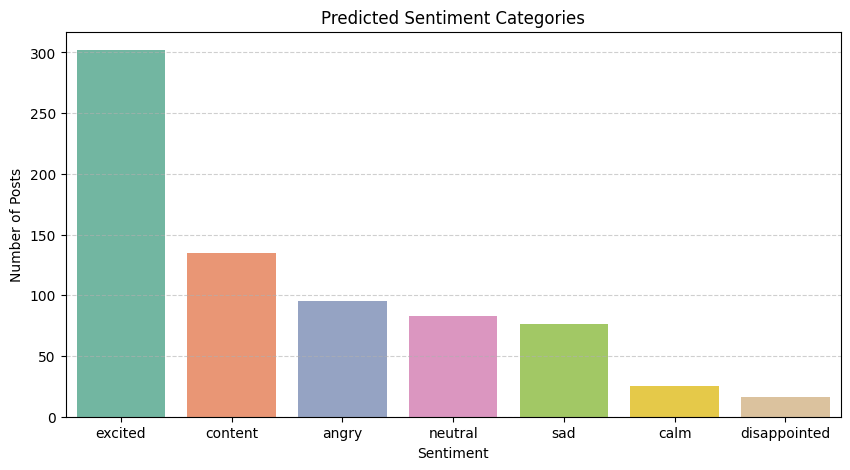

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Predicted_Sentiment", order=df["Predicted_Sentiment"].value_counts().index, palette="Set2")
plt.title("Predicted Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
